In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate1 as sr1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
# warnings.filterwarnings('ignore')

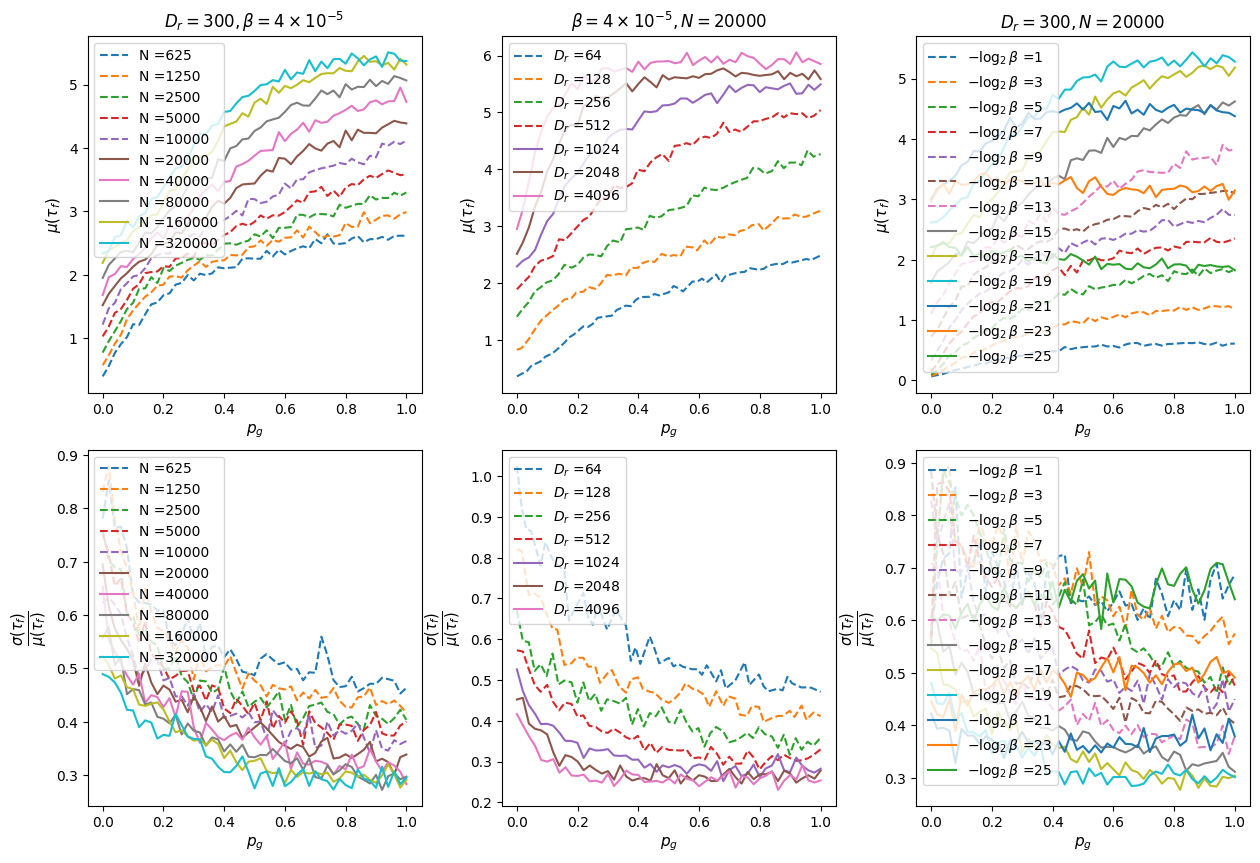

In [2]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
axs = [ax1, ax2, ax3, ax4, ax5, ax6]


save_folders = [ '../data/L63-Strategy-varying-trainsize/',\
                '../data/L63-Strategy-varying-featuresize/', '../data/L63-Strategy-varying-beta/']
Ms = [12, 10, 13, 25]
values = [[625*2**n for n in range(Ms[1])], [2**n for n in range(6, Ms[2])], [n for n in range(1, Ms[3]+1, 2)]]
values_ = [[np.log2(625*2**n) for n in range(Ms[1])], [n for n in range(6, Ms[2])], [n for n in range(1, Ms[3]+1, 2)]]
vars = ['N', r'$D_r$', r'$-\log_2\beta$']
vars_ = [r'$\log_2(\text{sample size})$', r'$\log_2(\text{train size})$', r'$\log_2(D_r)$', r'$-\log_2\beta$']

for i in range(3):
    colors = sns.color_palette()#('husl', len(values[i]))
    axs[i].set_prop_cycle('color', colors)
    axs[i+3].set_prop_cycle('color', colors)
    for j, item in enumerate(values[i]):
        if 2*j < len(values[i]):
            ls = 'dashed'
        else:
            ls = 'solid'
        bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[i] + str(item))
        tau, std = bsa.get_line('tau_f_se')
        axs[i].plot(bsa.percents, tau, label=f'{vars[i]} ={item}', linestyle=ls)
        # axs[i].scatter(bsa.percents, tau, s=10, marker='x')
        axs[i+3].plot(bsa.percents, std/tau, label=f'{vars[i]} ={item}', linestyle=ls)
    axs[i].set_xlabel(r'$p_g$', fontsize=11)
    axs[i].set_ylabel(r'$\mu(\tau_f)$', fontsize=11)
    axs[i].legend(fontsize=10, loc='upper left')
    axs[i+3].set_xlabel(r'$p_g$', fontsize=11)
    axs[i+3].set_ylabel(r'$\frac{\sigma(\tau_f)}{\mu(\tau_f)}$', fontsize=15)
    axs[i+3].legend(fontsize=10, loc='upper left')
ax1.set_title(r'$D_r=300, \beta=4\times10^{-5}$')
ax2.set_title(r'$\beta=4\times10^{-5}, N=20000$')
ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.24)
plt.savefig(f'../data/plots/tau_f_vs_p_g.png', dpi=300, bbox_inches='tight')

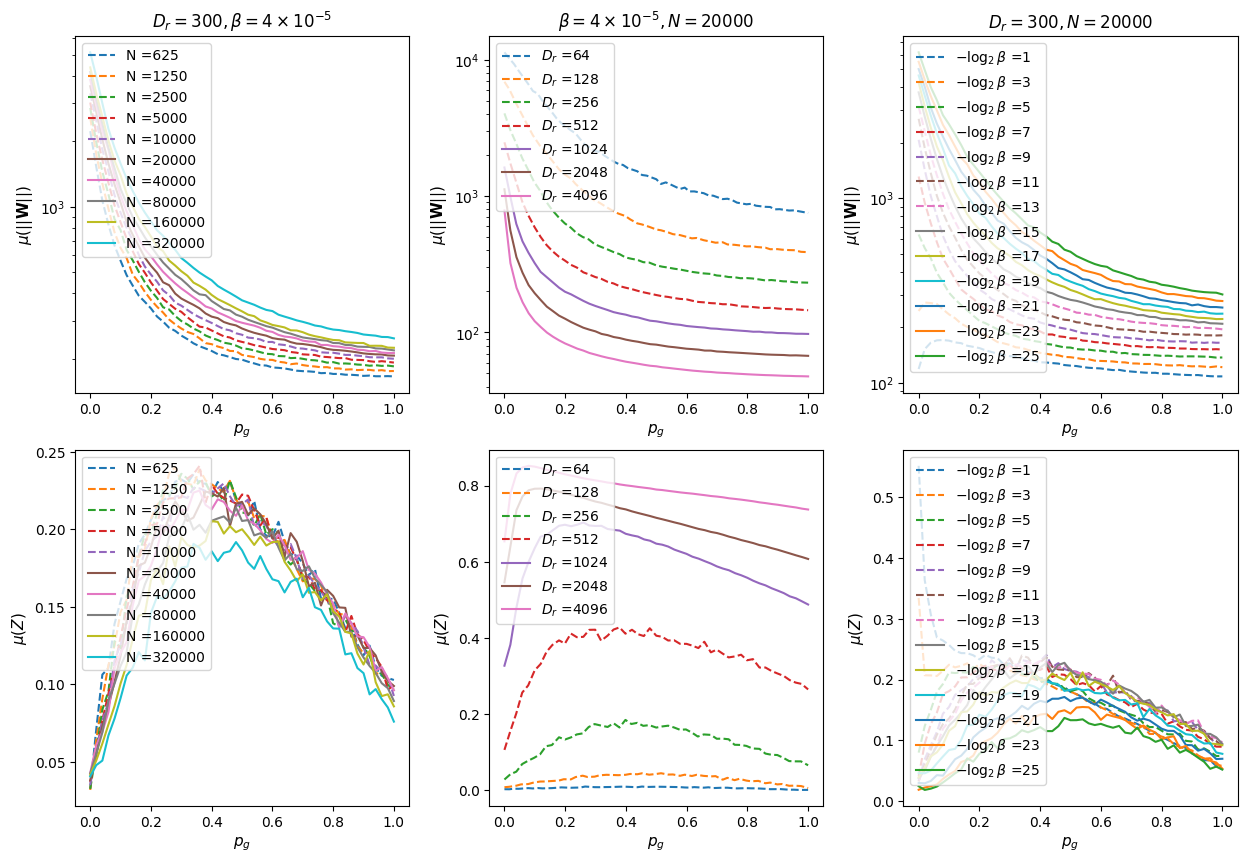

In [94]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(3):
    colors = sns.color_palette()#('husl', len(values[i]))
    axs[i].set_prop_cycle('color', colors)
    axs[i+3].set_prop_cycle('color', colors)
    for j, item in enumerate(values[i]):
        if 2*j < len(values[i]):
            ls = 'dashed'
        else:
            ls = 'solid'
        bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folders[i] + str(item))
        tau, std = bsa.get_line('||W||')
        zc, std = bsa.get_line('0_cols_W')
        axs[i].semilogy(bsa.percents, tau*bsa.D_r, label=f'{vars[i]} ={item}', linestyle=ls)
        # axs[i].scatter(bsa.percents, tau, s=10, marker='x')
        axs[i+3].plot(bsa.percents, zc, label=f'{vars[i]} ={item}', linestyle=ls)
    axs[i].set_xlabel(r'$p_g$', fontsize=11)
    axs[i].set_ylabel(r'$\mu(||\mathbf{W}||)$', fontsize=11)
    axs[i].legend(fontsize=10, loc='upper left')
    axs[i+3].set_xlabel(r'$p_g$', fontsize=11)
    axs[i+3].set_ylabel(r'$\mu(Z)$', fontsize=11)
    axs[i+3].legend(fontsize=10, loc='upper left')
ax1.set_title(r'$D_r=300, \beta=4\times10^{-5}$')
ax2.set_title(r'$\beta=4\times10^{-5}, N=20000$')
ax3.set_title(r'$D_r=300, N=20000$')
plt.subplots_adjust(hspace=0.16, wspace=0.24)
plt.savefig(f'../data/plots/W_vs_p_g.png', dpi=300, bbox_inches='tight')